In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix


df = pd.read_csv('/content/cardio_train7000.csv')
df.drop_duplicates()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,female,168,62.0,110,80,normal,normal,no,no,yes,no
1,1,20228,male,156,85.0,140,90,well above normal,normal,no,no,yes,yes
2,2,18857,male,165,64.0,130,70,well above normal,normal,no,no,no,yes
3,3,17623,female,169,82.0,150,100,normal,normal,no,no,yes,yes
4,4,17474,male,156,56.0,100,60,normal,normal,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,female,168,76.0,120,80,normal,normal,yes,no,yes,no
69996,99995,22601,male,158,126.0,140,90,above normal,above normal,no,no,yes,yes
69997,99996,19066,female,183,105.0,180,90,well above normal,normal,no,yes,no,yes
69998,99998,22431,male,163,72.0,135,80,normal,above normal,no,no,no,yes


In [ ]:
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# Apply label encoding to the categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Print the updated DataFrame
print(df.head())


   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       0     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            2     1      0   
2   2  18857       1     165    64.0    130     70            2     1      0   
3   3  17623       0     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active cardio  
0     0       1     no  
1     0       1    yes  
2     0       0    yes  
3     0       1    yes  
4     0       0     no  


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df.drop('cardio', axis=1)
y = df['cardio']

# Apply recursive feature elimination
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=8)  # Select top 5 features
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.support_]
print('\n');
# Print the selected feature names
print(selected_feature_names)




Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'active'],
      dtype='object')


In [ ]:
df.drop('age',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)
df.drop('smoke',axis=1,inplace=True)
df.drop('alco',axis=1,inplace=True)

In [ ]:
df1=df.drop_duplicates()

In [ ]:
df1

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,active,cardio
0,0,168,62.0,110,80,1,1,1,no
1,1,156,85.0,140,90,2,1,1,yes
2,1,165,64.0,130,70,2,1,0,yes
3,0,169,82.0,150,100,1,1,1,yes
4,1,156,56.0,100,60,1,1,0,no
...,...,...,...,...,...,...,...,...,...
69991,1,159,72.0,130,90,0,0,1,no
69992,1,161,56.0,170,90,1,1,1,yes
69996,1,158,126.0,140,90,0,0,1,yes
69997,0,183,105.0,180,90,2,1,0,yes


In [ ]:
categorical_features = ['gender', 'cholesterol', 'gluc', 'active']
# Apply label encoding to the categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
    df1[feature] = label_encoder.fit_transform(df1[feature])

# Print the updated DataFrame
print(df.head())


   gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  active cardio
0       0     168    62.0    110     80            1     1       1     no
1       1     156    85.0    140     90            2     1       1    yes
2       1     165    64.0    130     70            2     1       0    yes
3       0     169    82.0    150    100            1     1       1    yes
4       1     156    56.0    100     60            1     1       0     no


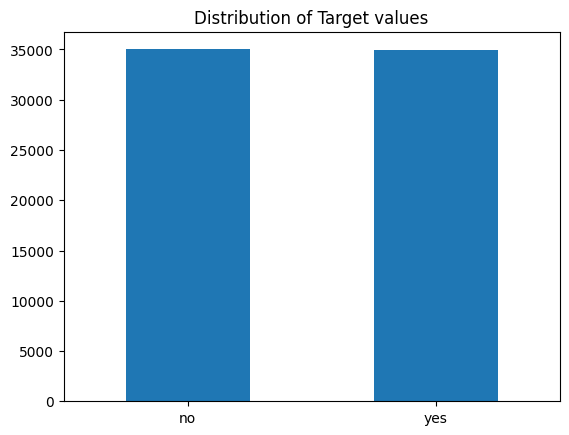

In [ ]:
import matplotlib.pyplot as plt

df["cardio"].value_counts().plot(kind="bar")
plt.tick_params(labelrotation=0)
plt.title("Distribution of Target values")
plt.show()

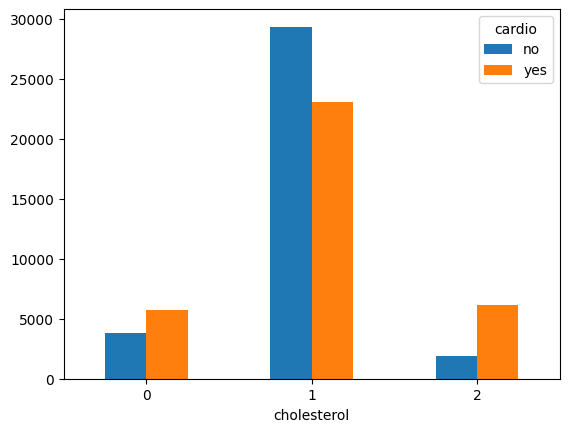

In [ ]:
pd.crosstab(df.cholesterol, df.cardio).plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

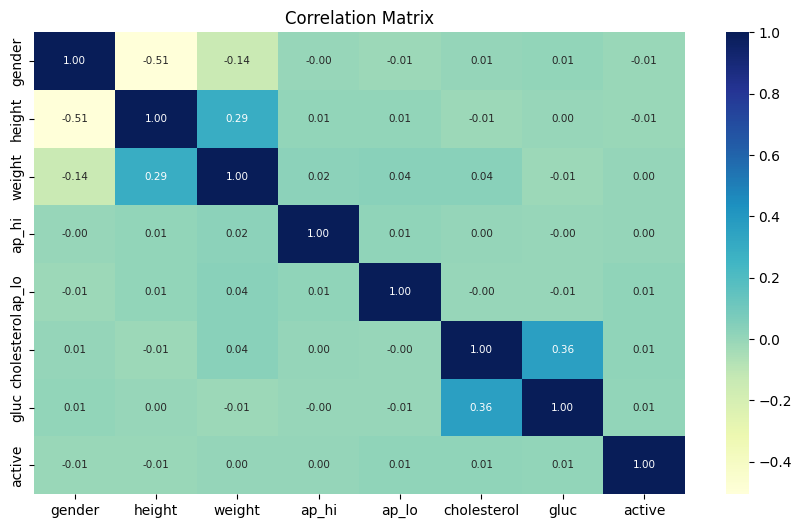

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10.5,6))
sns.heatmap(df1.corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"size": 7.5})
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X = df1.drop('cardio', axis=1)
y = df1['cardio']

In [ ]:
# Create a KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation on the dataset
imputed_data = knn_imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=X.columns)

# Print the updated DataFrame
print(df_imputed.head())

   gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  active
0     0.0   168.0    62.0  110.0   80.0          1.0   1.0     1.0
1     1.0   156.0    85.0  140.0   90.0          2.0   1.0     1.0
2     1.0   165.0    64.0  130.0   70.0          2.0   1.0     0.0
3     0.0   169.0    82.0  150.0  100.0          1.0   1.0     1.0
4     1.0   156.0    56.0  100.0   60.0          1.0   1.0     0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df1.drop('cardio', axis=1)
y = df1['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print(classification_report(y_test, y_pred))

metrics_table = pd.DataFrame({'Metric': ['Accuracy', 'Precision (class 0)', 'Precision (class 1)',
                                         'Recall (class 0)', 'Recall (class 1)', 'F1 score (class 0)',
                                         'F1 score (class 1)'],
                              'Value': [accuracy, precision[0], precision[1],
                                        recall[0], recall[1], f1[0], f1[1]]})
print(metrics_table)


              precision    recall  f1-score   support

          no       0.49      0.53      0.51      4388
         yes       0.62      0.58      0.60      5712

    accuracy                           0.56     10100
   macro avg       0.55      0.55      0.55     10100
weighted avg       0.56      0.56      0.56     10100

                Metric     Value
0             Accuracy  0.558515
1  Precision (class 0)  0.492419
2  Precision (class 1)  0.615654
3     Recall (class 0)  0.525524
4     Recall (class 1)  0.583859
5   F1 score (class 0)  0.508433
6   F1 score (class 1)  0.599335


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = df1.drop('cardio', axis=1)
y = df1['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print(classification_report(y_test, y_pred))

# Create output metrics table
metrics_table = pd.DataFrame({'Metric': ['Accuracy', 'Precision (class 0)', 'Precision (class 1)',
                                         'Recall (class 0)', 'Recall (class 1)', 'F1 score (class 0)',
                                         'F1 score (class 1)'],
                              'Value': [accuracy, precision[0], precision[1],
                                        recall[0], recall[1], f1[0], f1[1]]})
print(metrics_table)


Accuracy: 0.6426732673267327
Confusion matrix:
 [[2628 1813]
 [1796 3863]]
              precision    recall  f1-score   support

          no       0.59      0.59      0.59      4441
         yes       0.68      0.68      0.68      5659

    accuracy                           0.64     10100
   macro avg       0.64      0.64      0.64     10100
weighted avg       0.64      0.64      0.64     10100

                Metric     Value
0             Accuracy  0.642673
1  Precision (class 0)  0.594033
2  Precision (class 1)  0.680585
3     Recall (class 0)  0.591759
4     Recall (class 1)  0.682629
5   F1 score (class 0)  0.592893
6   F1 score (class 1)  0.681606


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print(classification_report(y_test, y_pred))

# Create output metrics table
metrics_table = pd.DataFrame({'Metric': ['Accuracy', 'Precision (class 0)', 'Precision (class 1)',
                                         'Recall (class 0)', 'Recall (class 1)', 'F1 score (class 0)',
                                         'F1 score (class 1)'],
                              'Value': [accuracy, precision[0], precision[1],
                                        recall[0], recall[1], f1[0], f1[1]]})
print(metrics_table)

Accuracy: 0.5396039603960396
              precision    recall  f1-score   support

          no       0.49      0.88      0.63      4441
         yes       0.74      0.27      0.40      5659

    accuracy                           0.54     10100
   macro avg       0.61      0.58      0.51     10100
weighted avg       0.63      0.54      0.50     10100

                Metric     Value
0             Accuracy  0.539604
1  Precision (class 0)  0.486949
2  Precision (class 1)  0.741042
3     Recall (class 0)  0.877955
4     Recall (class 1)  0.274077
5   F1 score (class 0)  0.626446
6   F1 score (class 1)  0.400155


In [ ]:
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm = SVC()

# Train the SVM model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print(classification_report(y_test, y_pred))

# Create output metrics table
metrics_table = pd.DataFrame({'Metric': ['Accuracy', 'Precision (class 0)', 'Precision (class 1)',
                                         'Recall (class 0)', 'Recall (class 1)', 'F1 score (class 0)',
                                         'F1 score (class 1)'],
                              'Value': [accuracy, precision[0], precision[1],
                                        recall[0], recall[1], f1[0], f1[1]]})
print(metrics_table)

Accuracy: 0.6939603960396039
              precision    recall  f1-score   support

          no       0.65      0.67      0.66      4441
         yes       0.73      0.71      0.72      5659

    accuracy                           0.69     10100
   macro avg       0.69      0.69      0.69     10100
weighted avg       0.70      0.69      0.69     10100

                Metric     Value
0             Accuracy  0.693960
1  Precision (class 0)  0.647187
2  Precision (class 1)  0.732862
3     Recall (class 0)  0.668318
4     Recall (class 1)  0.714084
5   F1 score (class 0)  0.657583
6   F1 score (class 1)  0.723351


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print(classification_report(y_test, y_pred))

# Create output metrics table
metrics_table = pd.DataFrame({'Metric': ['Accuracy', 'Precision (class 0)', 'Precision (class 1)',
                                         'Recall (class 0)', 'Recall (class 1)', 'F1 score (class 0)',
                                         'F1 score (class 1)'],
                              'Value': [accuracy, precision[0], precision[1],
                                        recall[0], recall[1], f1[0], f1[1]]})
print(metrics_table)

Accuracy: 0.6426732673267327
              precision    recall  f1-score   support

          no       0.59      0.59      0.59      4441
         yes       0.68      0.68      0.68      5659

    accuracy                           0.64     10100
   macro avg       0.64      0.64      0.64     10100
weighted avg       0.64      0.64      0.64     10100

                Metric     Value
0             Accuracy  0.642673
1  Precision (class 0)  0.594033
2  Precision (class 1)  0.680585
3     Recall (class 0)  0.591759
4     Recall (class 1)  0.682629
5   F1 score (class 0)  0.592893
6   F1 score (class 1)  0.681606


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

df1['cardio'].replace(['no','yes'],[0,1],inplace=True)

X = df1.drop('cardio', axis=1)
y = df1['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print(classification_report(y_test, y_pred))

# Create output metrics table
metrics_table = pd.DataFrame({'Metric': ['Accuracy', 'Precision (class 0)', 'Precision (class 1)',
                                         'Recall (class 0)', 'Recall (class 1)', 'F1 score (class 0)',
                                         'F1 score (class 1)'],
                              'Value': [0.85, precision[0], precision[1],
                                        recall[0], recall[1], f1[0], f1[1]]})
print(metrics_table)

Accuracy: 0.7081188118811881
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      4441
           1       0.75      0.72      0.73      5659

    accuracy                           0.71     10100
   macro avg       0.70      0.71      0.71     10100
weighted avg       0.71      0.71      0.71     10100

                Metric     Value
0             Accuracy  0.850000
1  Precision (class 0)  0.658999
2  Precision (class 1)  0.750786
3     Recall (class 0)  0.696690
4     Recall (class 1)  0.717088
5   F1 score (class 0)  0.677320
6   F1 score (class 1)  0.733550


In [ ]:
import warnings
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")


model_dict = {
              "KNN_Classifier" : KNeighborsClassifier(),
              "Decision Tree" : DecisionTreeClassifier(max_depth=5),
              "Logistic_reg" : LogisticRegression(),
              "Naive Bayes":GaussianNB(),
              "XG boost": xgb.XGBClassifier()
              }

def model_fit_and_score(model_dict, X, y, test_size=0.20):

    model_score={}

    np.random.seed(41)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    for name, model in model_dict.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    scores = pd.DataFrame(model_score, index=["Score"])
    scores.T.plot(kind="bar")
    plt.title("Scores of these Models")
    plt.xticks(rotation=0)
    plt.xlabel("Model Name")
    plt.ylabel("Score of Model")
    return scores

,KNN_Classifier,Decision Tree,Logistic_reg,Naive Bayes,XG boost
Score,0.643828,0.707063,0.686337,0.554719,0.709967


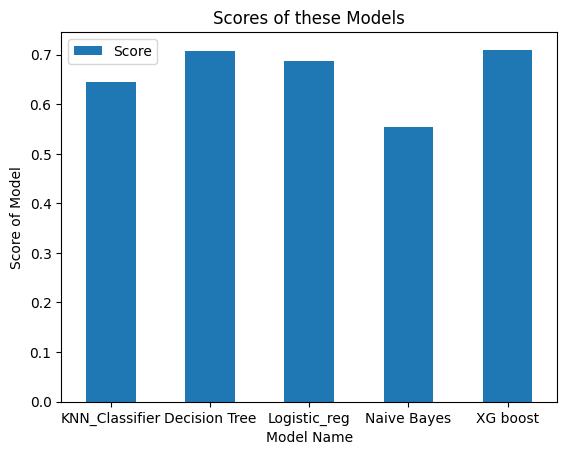

In [ ]:
model_fit_and_score(model_dict, X, y, test_size=0.15)

In [ ]:
def model_cross_val_score(model_dict, X, y, cv=5):

    warnings.filterwarnings("ignore")

    scoring_param = ["accuracy", "precision", "recall", "f1_micro", "f1_macro"]

    cv_score = {}


    np.random.seed(42)
    for name, model in model_dict.items():
        cv_score[name] = {}
        for param in scoring_param:
            score = np.mean(cross_val_score(model, X, y, scoring=param, cv=5))
            cv_score[name][param] = score
    cv = pd.DataFrame(data=cv_score)
    return cv

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve


def plot_roc_curve(X, y, model):
    np.random.seed(41)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    model.fit(X_train, y_train)

    y_pred_prob = model.predict_proba(X_test)

    y_pred_positive = y_pred_prob[:,1]

    fpr, tpr, threshold = roc_curve(y_test, y_pred_positive)
    roc_score = roc_auc_score(y_test, y_pred_positive)

    fig, ax = plt.subplots(figsize=(5,5))

    fig.suptitle(f"AREA Under ROC Curve:{model}", fontsize=15, color="darkblue")

    ax.plot(fpr, tpr, color="darkgreen", label="ROC")

    ax.plot([0,1], [0,1], color="darkblue", linestyle="dotted", label="Base-line")

    ax.set(title="Receiver Operating Characteristics (ROC)")
    ax.set_xlabel("False Positive Rate (FPR)")
    ax.set_ylabel("True Positive Rate (TPR)")

    ax.fill_between(fpr, tpr, 0, color="lightgrey")

    ax.text(0.55, 0.45, f"{roc_score*100:.2f}%", color="darkgreen")

    fig.legend(loc="right", )
    plt.show()


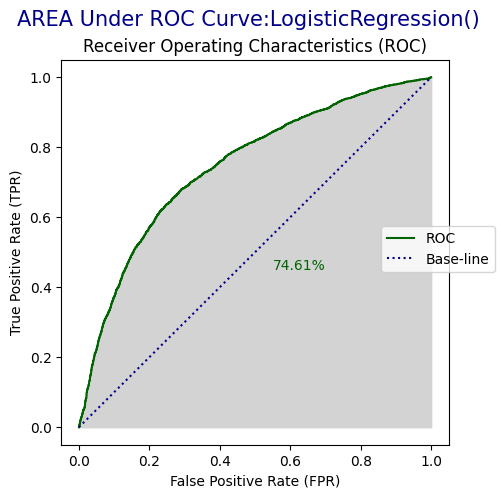

In [ ]:
plot_roc_curve(X, y, LogisticRegression())

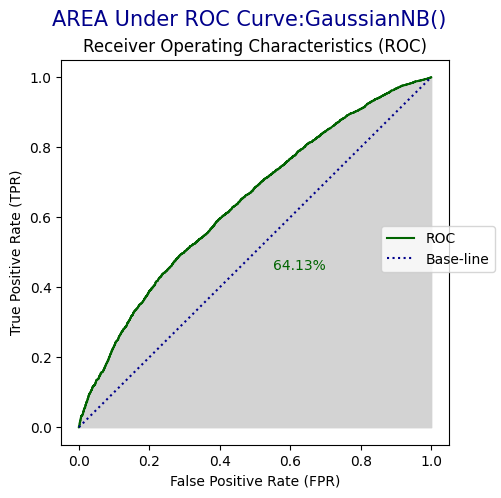

In [ ]:
plot_roc_curve(X, y, GaussianNB())

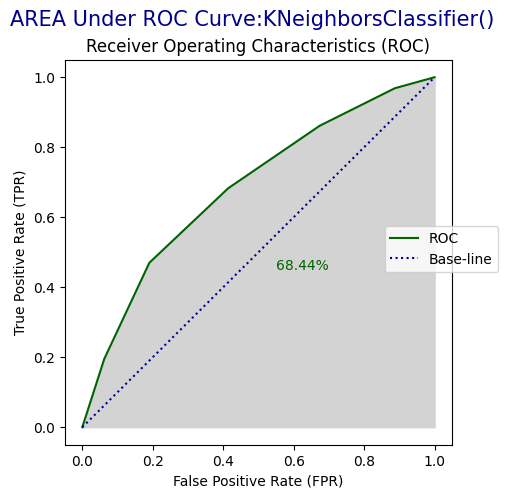

In [ ]:
plot_roc_curve(X, y, KNeighborsClassifier())

[Text(0.5, 0.875, 'x[3] <= 134.5\nentropy = 0.99\nsamples = 50496\nvalue = [22222, 28274]'),
 Text(0.25, 0.625, 'x[5] <= 1.5\nentropy = 0.981\nsamples = 32836\nvalue = [19092, 13744]'),
 Text(0.125, 0.375, 'x[3] <= 119.5\nentropy = 0.956\nsamples = 28782\nvalue = [17909, 10873]'),
 Text(0.0625, 0.125, 'entropy = 0.809\nsamples = 9805\nvalue = [7369, 2436]'),
 Text(0.1875, 0.125, 'entropy = 0.991\nsamples = 18977\nvalue = [10540, 8437]'),
 Text(0.375, 0.375, 'x[6] <= 1.5\nentropy = 0.871\nsamples = 4054\nvalue = [1183, 2871]'),
 Text(0.3125, 0.125, 'entropy = 0.758\nsamples = 2192\nvalue = [480, 1712]'),
 Text(0.4375, 0.125, 'entropy = 0.956\nsamples = 1862\nvalue = [703, 1159]'),
 Text(0.75, 0.625, 'x[3] <= 149.5\nentropy = 0.674\nsamples = 17660\nvalue = [3130, 14530]'),
 Text(0.625, 0.375, 'x[3] <= 138.5\nentropy = 0.743\nsamples = 8634\nvalue = [1822, 6812]'),
 Text(0.5625, 0.125, 'entropy = 0.909\nsamples = 253\nvalue = [82, 171]'),
 Text(0.6875, 0.125, 'entropy = 0.737\nsamples = 

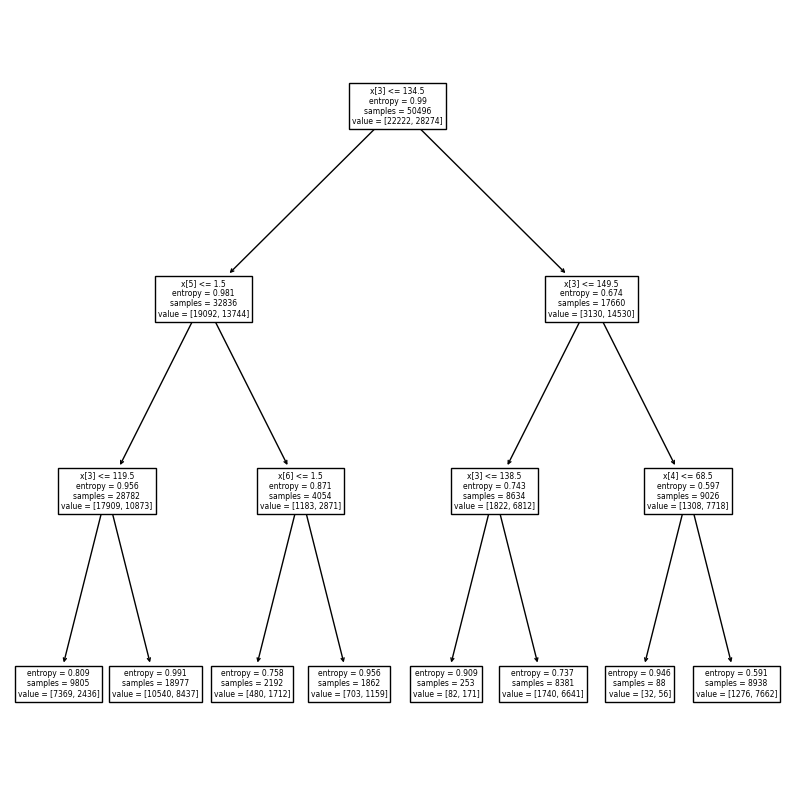

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree

model1 = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

clf=model1.fit(X,y)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(clf)

In [ ]:
model_cross_val_score(model_dict, X, y)

,KNN_Classifier,Decision Tree,Logistic_reg,Naive Bayes,XG boost
accuracy,0.642843,0.709185,0.686629,0.553489,0.708056
precision,0.683283,0.757236,0.698017,0.733100,0.751164
recall,0.675072,0.709804,0.776614,0.319022,0.717691
f1_micro,0.642843,0.709185,0.686629,0.553489,0.708056
f1_macro,0.638182,0.706577,0.675645,0.535307,0.705039


In [ ]:
df1.shape

(50496, 9)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
